# 金融應用程式設計作業-財報分析
## 主題目錄
1. **爬取三大報表**：
   1. 現金流量表
   2. 資產負債表
   3. 綜合損益表
2. **設計程式碼，自動化爬取個股資訊**：
   1. 個股股本
   2. 經營績效
   3. 個股獲利能力
   4. 個股合併月營收
   5. 財務比率（獲利能力指標/每股比率指標/成長率指標/經營能力指標/債償能力指標/成本費用率指標/其他指標）
3. **分析（一）：總資產周轉次數分析**（以7家水泥股為例分析比較）
4. **分析（二）：EPS分析**（以7家水泥股為例分析比較）
5. **分析（三）：營收分析**（以7家水泥股為例分析比較）
6. **分析（四）：營業分析**（以7家水泥股為例分析比較）
7. **分析（五）：企業償債能力分析**(以7家水泥股為例分析比較）

# 現金流量表

In [4]:
import pandas as pd
stocknumber="2330"

df = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zc3/zc3_'+stocknumber+'.djhtm')
df = df[2][0:]
#df.columns = df.iloc[0]
df

,0,1,2,3,4,5,6,7,8
0,期別,2020.1Q,2019.4Q,2019.3Q,2019.2Q,2019.1Q,2018.4Q,2018.3Q,2018.2Q
1,種類,合併,合併,合併,合併,合併,合併,合併,合併
2,稅前淨利－CFO,132147,128782,112336,80545,68182,111082,98897,87588
3,折舊－CFO,67084,66137,65377,73705,76192,74806,72505,70351
4,攤提－CFO,1471,1394,1379,1344,1355,1224,1105,1057
...,...,...,...,...,...,...,...,...,...
92,籌資活動之現金流量,-40757,-17183,-229112,-931,-22413,14283,-172435,-29346
93,匯率影響數,2099,-11197,-1618,1914,1787,2687,-1672,14095
94,本期產生現金流量,-24622,2969,-197267,4027,67856,89082,-143498,54447
95,期初現金及約當現金,455399,452430,649697,645671,577815,488732,632230,577783


In [5]:
df_T = df.T
df_T

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,期別,種類,稅前淨利－CFO,折舊－CFO,攤提－CFO,預期信用減損損失（利益）－CFO,透過損益按公允價值衡量金融資產及負債之淨損失（利益）－,除列按攤銷後成本衡量金融資產淨損失（利益）－CFO,金融資產重分類淨損失（利益）－CFO,存貨跌價損失增加（減少）－CFO,...,取得子公司股權－CFF,處分子公司股權－CFF,支付利息－CFF,退還（支付）所得稅－CFF,調整項（出貨）－CFF,籌資活動之現金流量,匯率影響數,本期產生現金流量,期初現金及約當現金,期末現金及約當現金
1,2020.1Q,合併,132147,67084,1471,2,3,0,0,0,...,0,0,-977,0,-670,-40757,2099,-24622,455399,430777
2,2019.4Q,合併,128782,66137,1394,-1,-2,0,0,0,...,0,0,-539,0,-460,-17183,-11197,2969,452430,455399
3,2019.3Q,合併,112336,65377,1379,4,68,0,0,0,...,0,0,-1433,0,-986,-229112,-1618,-197267,649697,452430
4,2019.2Q,合併,80545,73705,1344,4,552,0,0,0,...,0,0,-437,0,-1558,-931,1914,4027,645671,649697
5,2019.1Q,合併,68182,76192,1355,-5,338,0,0,0,...,0,0,-1189,0,-562,-22413,1787,67856,577815,645671
6,2018.4Q,合併,111082,74806,1224,-0,113,0,0,0,...,0,0,-437,0,425,14283,2687,89082,488732,577815
7,2018.3Q,合併,98897,72505,1105,-1,184,0,0,0,...,0,0,-1253,0,467,-172435,-1672,-143498,632230,488732
8,2018.2Q,合併,87588,70351,1057,-1,32,0,0,0,...,0,0,-545,0,-1107,-29346,14095,54447,577783,632230


In [6]:
x = df_T.values.tolist()[0]
x

['期別',
 '種類',
 '稅前淨利－CFO',
 '折舊－CFO',
 '攤提－CFO',
 '預期信用減損損失（利益）－CFO',
 '透過損益按公允價值衡量金融資產及負債之淨損失（利益）－',
 '除列按攤銷後成本衡量金融資產淨損失（利益）－CFO',
 '金融資產重分類淨損失（利益）－CFO',
 '存貨跌價損失增加（減少）－CFO',
 '利息支出－CFO',
 '存貨盤（盈）虧及報廢－CFO',
 '利息收入－CFO',
 '股利收入－CFO',
 '股份基礎給付酬勞成本－CFO',
 '採用權益法認列之關聯企業及合資利益份額－CFO',
 '採用權益法認列之關聯企業及合資損失份額－CFO',
 '處分不動產、廠房及設備收益－CFO',
 '處分不動產、廠房及設備損失－CFO',
 '處分投資性不動產損失（利益）－CFO',
 '處分無形資產損失（利益）－CFO',
 '處分投資損失－CFO',
 '處分投資利益－CFO',
 '金融商品減損損失－CFO',
 '金融商品減損迴轉利益－CFO',
 '資產減損損失－CFO',
 '資產減損迴轉利益－CFO',
 '買回公司債損失（利益）－CFO',
 '提列各項準備－CFO',
 '回轉各項準備－CFO',
 '透過損益按公允價值衡量之金融資產（增加）減少－CFO',
 '避險之金融資產（增加）減少－CFO',
 '合約資產（增加）減少－CFO',
 '應收帳款（增加）減少－CFO',
 '其他應收帳款（增加）減少－CFO',
 '存貨（增加）減少－CFO',
 '預付款（增加）減少－CFO',
 '生物性資產（增加）減少－CFO',
 '其他金融資產（增加）減少－CFO',
 '透過損益按公允價值衡量金融負債增加（減少）－CFO',
 '避險之金融負債增加（減少）－CFO',
 '合約負債增加（減少）－CFO',
 '應付帳款增加（減少）－CFO',
 '其他應付款增加（減少）－CFO',
 '其他金融負債增加（減少）－CFO',
 '負債準備增加（減少）CFO－CFO',
 '提列員工退休金準備－CFO',
 '支付員工退休金－CFO',
 '利息收現－CFO',
 '收取股利－CFO',
 '支付利息－CFO',
 '支付股利－CFO',
 '退還（支付）所得稅－CFO',
 '調整項（出貨）－

# 資產負債表

In [7]:
import pandas as pd
stocknumber="2330"

df = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcp/zcpa/zcpa_'+stocknumber+'.djhtm')
df = df[2][0:]
#df.columns = df.iloc[0]
df

,0,1,2,3,4,5,6,7,8
0,期別,2020.1Q,2019.4Q,2019.3Q,2019.2Q,2019.1Q,2018.4Q,2018.3Q,2018.2Q
1,種類,合併,合併,合併,合併,合併,合併,合併,合併
2,現金及約當現金,430777,455399,452430,649697,645671,577815,488732,632230
3,透過損益按公允價值衡量之金融資產－流動,1254,327,322,1323,3084,3505,4057,1205
4,透過其他綜合損益按公允價值衡量之金融資產－流動,129219,127397,132133,113594,107313,99562,99214,102028
...,...,...,...,...,...,...,...,...,...
89,共同控制下前手權益,0,0,0,0,0,0,0,0
90,合併前非屬共同控制股權,0,0,0,0,0,0,0,0
91,非控制權益,763,685,641,607,672,679,658,634
92,股東權益總額,1677029,1622095,1587497,1554422,1743518,1677496,1575830,1490635


In [8]:
df_T = df.T
df_T

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,期別,種類,現金及約當現金,透過損益按公允價值衡量之金融資產－流動,透過其他綜合損益按公允價值衡量之金融資產－流動,按攤銷後成本衡量之金融資產－流動,避險之金融資產－流動,合約資產－流動,應收帳款及票據,其他應收款,...,未分配盈餘,保留盈餘,其他權益,庫藏股票帳面值,母公司股東權益合計,共同控制下前手權益,合併前非屬共同控制股權,非控制權益,股東權益總額,負債及股東權益總額
1,2020.1Q,合併,430777,1254,129219,302,0,0,146421,60,...,1046781,1385496,-24873,0,1676266,0,0,763,1677029,2343296
2,2019.4Q,合併,455399,327,127397,300,26,0,139771,52,...,1011513,1333335,-27568,0,1621410,0,0,685,1622095,2264805
3,2019.3Q,合併,452430,322,132133,0,37,0,145422,57,...,963374,1281906,-10675,0,1586856,0,0,641,1587497,2134234
4,2019.2Q,合併,649697,1323,113594,0,1,0,116131,1542,...,923705,1245576,-7386,0,1553815,0,0,607,1554422,2239344
5,2019.1Q,合併,645671,3084,107313,4179,1,0,106741,49,...,1135005,1437946,-10725,0,1742846,0,0,672,1743518,2187437
6,2018.4Q,合併,577815,3505,99562,14278,23,0,129198,65,...,1073707,1376648,-15450,0,1676818,0,0,679,1677496,2090128
7,2018.3Q,合併,488732,4057,99214,11892,124,0,129540,64,...,974796,1277738,-18181,0,1575172,0,0,658,1575830,1969889
8,2018.2Q,合併,632230,1205,102028,13427,32,0,88196,3186,...,886529,1189471,-15080,0,1490002,0,0,634,1490635,2053413


In [9]:
x = df_T.values.tolist()[0]
x

['期別',
 '種類',
 '現金及約當現金',
 '透過損益按公允價值衡量之金融資產－流動',
 '透過其他綜合損益按公允價值衡量之金融資產－流動',
 '按攤銷後成本衡量之金融資產－流動',
 '避險之金融資產－流動',
 '合約資產－流動',
 '應收帳款及票據',
 '其他應收款',
 '資金貸予他人－流動',
 '存貨',
 '生物資產流動',
 '預付費用及預付款',
 '應收代理店款',
 '待出售非流動資產',
 '當期所得稅資產－流動',
 '其他金融資產－流動',
 '其他流動資產',
 '流動資產',
 '透過損益按公允價值衡量之金融資產－非流動',
 '透過其他綜合損益按公允價值衡量之金融資產－非流動',
 '按攤銷後成本衡量之金融資產－非流動',
 '避險之金融資產－非流動',
 '合約資產－非流動',
 '採權益法之長期股權投資',
 '預付投資款',
 '不動產廠房及設備',
 '商譽淨額',
 '特許權',
 '發展中之無形資產',
 '其他無形資產淨額',
 '商譽及無形資產合計',
 '遞延資產合計',
 '遞延借項－非流動',
 '投資性不動產淨額',
 '預付設備款',
 '長期預付租金',
 '生物資產非流動',
 '其他非流動資產－其他',
 '其他非流動資產',
 '非流動資產',
 '資產總額',
 '短期借款',
 '應付商業本票／承兌匯票',
 '透過損益按公允價值衡量之金融負債－流動',
 '避險之金融負債－流動',
 '按攤銷後成本衡量之金融負債－流動',
 '合約負債－流動',
 '應付帳款及票據',
 '其他應付款',
 '當期所得稅負債',
 '負債準備－流動',
 '與待出售非流動資產直接相關之負債',
 '其他金融負債－流動',
 '一年內到期長期負債',
 '特別股負債－流動',
 '應付代理店款',
 '其他流動負債',
 '流動負債',
 '透過損益按公允價值衡量之金融負債－非流動',
 '避險之金融負債－非流動',
 '按攤銷後成本衡量之金融負債－非流動',
 '合約負債－非流動',
 '特別股負債－非流動',
 '應付公司債－非流動',
 '銀行借款－非流動',
 '其他長期借款－非流動',
 '負債準備－非流動',
 '遞延貸項',
 '應計退休金負債',
 '遞延所得稅',
 '其他非

# 綜合損益表

In [10]:
import pandas as pd
stocknumber="2330"

df = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcq/zcq_'+stocknumber+'.djhtm')
df = df[2][0:]
#df.columns = df.iloc[0]
df

,0,1,2,3,4,5,6,7,8
0,期別,2020.1Q,2019.4Q,2019.3Q,2019.2Q,2019.1Q,2018.4Q,2018.3Q,2018.2Q
1,種類,合併,合併,合併,合併,合併,合併,合併,合併
2,營業收入毛額,310597,317237,293045,240998,218704,289770,260348,233277
3,營業收入淨額,310597,317237,293045,240998,218704,289770,260348,233277
4,銷貨成本,149813,157996,153613,137325,128352,151728,136967,121689
...,...,...,...,...,...,...,...,...,...
102,庫藏股數－母公司,0,0,0,0,0,0,0,0
103,庫藏股數－子公司持有母公司股票或其他,0,0,0,0,0,0,0,0
104,庫藏股數（母持及子持母）,0,0,0,0,0,0,0,0
105,稅前息前淨利,132678,129426,113180,81410,69081,111958,99636,88216


In [11]:
df_T = df.T
df_T #上一個表格的欄位互換

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
0,期別,種類,營業收入毛額,營業收入淨額,銷貨成本,營業成本,營業毛利,聯屬公司已（未）實現銷貨利益,已實現銷貨毛利,營業費用,...,綜合損益歸屬共同控制下前手權益,每股盈餘,加權平均股數,發放特別股股息,常續性稅後淨利,庫藏股數－母公司,庫藏股數－子公司持有母公司股票或其他,庫藏股數（母持及子持母）,稅前息前淨利,稅前息前折舊前淨利
1,2020.1Q,合併,310597,310597,149813,149813,160784,-8,160777,32323,...,0,4.51,25930,0,116974,0,0,0,132678,201232
2,2019.4Q,合併,317237,317237,157996,157996,159241,-39,159202,34943,...,0,4.47,25930,0,117108,0,0,0,129426,196957
3,2019.3Q,合併,293045,293045,153613,153613,139432,-20,139412,31379,...,0,3.90,25930,0,101717,0,0,0,113180,179936
4,2019.2Q,合併,240998,240998,137325,137325,103673,57,103730,27165,...,0,2.57,25930,0,66408,0,0,0,81410,156459
5,2019.1Q,合併,218704,218704,128352,128352,90352,5,90358,26018,...,0,2.37,25930,0,61926,0,0,0,69081,146629
6,2018.4Q,合併,289770,289770,151728,151728,138042,77,138119,30852,...,0,3.86,25930,0,100588,0,0,0,111958,187988
7,2018.3Q,合併,260348,260348,136967,136967,123381,-14,123367,28128,...,0,3.44,25930,0,90013,0,0,0,99636,173246
8,2018.2Q,合併,233277,233277,121689,121689,111588,-57,111531,26440,...,0,2.79,25930,0,74940,0,0,0,88216,159625


In [12]:
x = df_T.values.tolist()[0]
x

['期別',
 '種類',
 '營業收入毛額',
 '營業收入淨額',
 '銷貨成本',
 '營業成本',
 '營業毛利',
 '聯屬公司已（未）實現銷貨利益',
 '已實現銷貨毛利',
 '營業費用',
 '推銷費用',
 '管理費用',
 '研究發展費',
 '其他費用',
 '預期信用減損（損失）利益－營業費用',
 '其他收益及費損淨額',
 '營業利益',
 '利息收入',
 '租金收入',
 '權利金收入',
 '股利收入',
 '廉價購買收益',
 '違約金收入',
 '預期信用減損利益',
 '沖銷逾期應付帳款利益',
 '補助收益',
 '其他收入－其他',
 '其他收入',
 '處分不動產、廠房及設備利益',
 '處分投資利益',
 '外幣兌換利益',
 '透過損益按公允價值衡量之金融資產（負債）利益',
 '按攤銷後成本衡量之金融負債利益',
 '避險工具之利益',
 '資產評價利益',
 '金融資產減損迴轉利益',
 '資產減損迴轉利益',
 '賠償收入',
 '買回公司債利益',
 '停工損失',
 '合約損失',
 '賠償損失',
 '處分不動產、廠房及設備損失',
 '處分投資損失',
 '外幣兌換損失',
 '透過損益按公允價值衡量之金融資產（負債）損失',
 '按攤銷後成本衡量之金融負債損失',
 '避險工具之損失',
 '資產評價損失',
 '金融資產減損損失',
 '資產減損損失',
 '買回公司債損失',
 '其他利益及損失－其他',
 '其他利益及損失',
 '利息支出',
 '負債性特別股股息',
 '財務成本－其他',
 '財務成本',
 '採權益法之關聯企業及合資損益之份額',
 '預期信用減損（損失）利益',
 '除列按攤銷後成本衡量金融資產淨損益',
 '金融資產重分類淨損益',
 '營業外收入及支出－其他',
 '營業外收入及支出',
 '稅前淨利',
 '所得稅費用',
 '繼續營業單位損益',
 '停業單位損益',
 '合併前非屬共同控制股權損益',
 '其他損益調整項－非常項目及累計影響數',
 '合併總損益',
 '確定福利計畫之再衡量數－不重分類－OCI',
 '不動產重估價之利益（損失）－不重分類－OCI',
 '指定按公允價值衡量金融負債信用風險變動影響－不重分－',
 '待售待分業主非流資（處分群

# 個股股本形成

In [13]:
import pandas as pd
stocknumber="2330"

df = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcb/zcb_'+stocknumber+'.djhtm')
df = df[2][1:]
df = df[0:29]
#df.columns = df.iloc[0]
df

,0,1,2,3,4,5,6
1,年度,現金增資,比重,盈餘轉增資,比重,公積及其他,比重
2,109,72.096468,2.78%,2288.442323,88.25%,232.499258,8.97%
3,108,72.096468,2.78%,2288.442323,88.25%,232.499258,8.97%
4,107,72.096468,2.78%,2288.442323,88.25%,232.499258,8.97%
5,106,72.096468,2.78%,2288.442323,88.25%,232.499258,8.97%
6,105,72.096468,2.78%,2288.442323,88.25%,232.499258,8.97%
7,104,72.096468,2.78%,2288.442323,88.25%,232.499258,8.97%
8,103,72.096438,2.78%,2288.442323,88.26%,232.427478,8.96%
9,102,72.096418,2.78%,2288.442323,88.26%,232.322968,8.96%
10,101,72.096388,2.78%,2288.442323,88.27%,231.904858,8.95%


# 經營績效

In [14]:
import pandas as pd
stocknumber="2330"

df = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcd/zcd_'+stocknumber+'.djhtm')
df = df[2][1:]
#df.columns = df.iloc[0]
df

,0,1,2,3,4,5,6,7
1,季別,加權平均股數,營業收入,稅前淨利,稅後淨利,每股營收(元),稅前每股盈餘(元),稅後每股盈餘(元)
2,109.1Q,25930380,310597,132147,116987,11.98,5.10,4.51
3,108.4Q,25930380,317237,128782,116035,12.23,4.97,4.47
4,108.3Q,25930380,293045,112336,101070,11.30,4.33,3.90
5,108.2Q,25930380,240998,80545,66765,9.29,3.11,2.57
6,108.1Q,25930380,218704,68182,61394,8.43,2.63,2.37
7,107.4Q,25930380,289770,111082,99984,11.17,4.28,3.86
8,107.3Q,25930380,260348,98897,89072,10.04,3.81,3.44
9,107.2Q,25930380,233277,87588,72291,9.00,3.38,2.79
10,107.1Q,25930380,248079,99944,89785,9.57,3.85,3.46


# 個股獲利能力

In [15]:
import pandas as pd
stocknumber="2330"

df = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zce/zce_'+stocknumber+'.djhtm')
df = df[2][2:]
#df.columns = df.iloc[0]
df

,0,1,2,3,4,5,6,7,8,9
2,季別,營業收入,營業成本,營業毛利,毛利率,營業利益,營益率,業外收支,稅前淨利,稅後淨利
3,109.1Q,310597,149813,160784,51.77%,128522,41.38%,3626,132147,116987
4,108.4Q,317237,157996,159241,50.20%,124244,39.16%,4538,128782,116035
5,108.3Q,293045,153613,139432,47.58%,107887,36.82%,4449,112336,101070
6,108.2Q,240998,137325,103673,43.02%,76304,31.66%,4241,80545,66765
7,108.1Q,218704,128352,90352,41.31%,64266,29.38%,3916,68182,61394
8,107.4Q,289770,151728,138042,47.64%,107123,36.97%,3959,111082,99984
9,107.3Q,260348,136967,123381,47.39%,95245,36.58%,3652,98897,89072
10,107.2Q,233277,121689,111588,47.84%,84428,36.19%,3159,87588,72291
11,107.1Q,248079,123104,124975,50.38%,96827,39.03%,3117,99944,89785


# 個股合併月營收

In [16]:
import pandas as pd
stocknumber="2330"

df = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zch/zch_'+stocknumber+'.djhtm')
df = df[2][2:]
df = df[3:]
#df.columns = df.iloc[0]
df

,0,1,2,3,4,5,6,7
5,年/月,營收,月增率,去年同期,年增率,累計營收,年增率,NaN
6,109/04,96001572,-15.43%,74693615,28.53%,406598755,38.58%,NaN
7,109/03,113519599,21.55%,79721587,42.40%,310597183,42.02%,NaN
8,109/02,93394449,-9.92%,60889055,53.38%,197077584,41.80%,NaN
9,109/01,103683135,0.36%,78093827,32.77%,103683135,32.77%,NaN
10,108/12,103313138,-4.24%,89830598,15.01%,1069985448,3.73%,NaN
11,108/11,107884396,1.74%,98389414,9.65%,966672310,2.66%,NaN
12,108/10,106039531,3.79%,101550181,4.42%,858787914,1.84%,NaN
13,108/09,102170096,-3.72%,94921920,7.64%,752748383,1.49%,NaN
14,108/08,106117619,25.20%,91055038,16.54%,650578287,0.59%,NaN


# 財務比率 獲利能力指標

In [17]:
import pandas as pd
stocknumber="2330"

df = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df = df[2][0:]
df = df[:15]
#df.columns = df.iloc[0]
df

,0,1,2,3,4,5,6,7,8
0,獲利能力指標單位：%,獲利能力指標單位：%,獲利能力指標單位：%,獲利能力指標單位：%,獲利能力指標單位：%,獲利能力指標單位：%,獲利能力指標單位：%,獲利能力指標單位：%,獲利能力指標單位：%
1,期別,2020.1Q,2019.4Q,2019.3Q,2019.2Q,2019.1Q,2018.4Q,2018.3Q,2018.2Q
2,種類,合併,合併,合併,合併,合併,合併,合併,合併
3,ROA(C)稅前息前折舊前,8.73,9.04,8.26,7.08,6.88,9.42,8.75,7.87
4,ROA(A)稅後息前,5.1,5.3,4.65,3.05,2.9,4.96,4.46,3.55
5,ROA(B)稅後息前折舊前,7.48,7.8,7.12,5.74,5.83,7.99,7.43,6.46
6,ROE(A)─稅後,7.1,7.23,6.44,4.05,3.59,6.15,5.81,4.67
7,ROE(B)─常續利益,7.09,7.3,6.47,4.03,3.62,6.18,5.87,4.84
8,營業毛利率,51.77,50.2,47.58,43.02,41.31,47.64,47.39,47.84
9,已實現銷貨毛利率,51.76,50.18,47.57,43.04,41.31,47.67,47.39,47.81


# 財務比率 每股比率指標

In [18]:
import pandas as pd
stocknumber="2330"

df = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df = df[2][0:]
df = df[16:26]
#df.columns = df.iloc[0]
df

,0,1,2,3,4,5,6,7,8
16,期別,2020.1Q,2019.4Q,2019.3Q,2019.2Q,2019.1Q,2018.4Q,2018.3Q,2018.2Q
17,種類,合併,合併,合併,合併,合併,合併,合併,合併
18,每股淨值(F)(TSE公告數),64.64,62.53,61.2,59.92,67.21,64.67,60.75,57.46
19,常續性EPS,15.5,13.38,12.75,12.3,12.63,13.67,13.61,13.57
20,每股現金流量,7.83,7.83,5.47,4.54,5.89,7.3,3.63,5
21,每股營業額(元),11.98,12.23,11.3,9.29,8.43,11.17,10.04,9
22,每股營業利益(元),4.96,4.79,4.16,2.94,2.48,4.13,3.67,3.26
23,每股稅前淨利(元),5.1,4.97,4.33,3.11,2.63,4.28,3.81,3.38
24,每股綜合損益,4.62,3.83,3.77,2.71,2.55,3.92,3.29,3.53
25,每股盈餘,4.51,4.47,3.9,2.57,2.37,3.86,3.44,2.79


# 財務比率 成長率指標

In [48]:
import pandas as pd
stocknumber="2330"

df = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df = df[2][0:]
df = df[27:45]
#df.columns = df.iloc[0]
df

,0,1,2,3,4,5,6,7,8
27,期別,2020.1Q,2019.4Q,2019.3Q,2019.2Q,2019.1Q,2018.4Q,2018.3Q,2018.2Q
28,種類,合併,合併,合併,合併,合併,合併,合併,合併
29,營收成長率,42.02,9.48,12.56,3.31,-11.84,4.4,3.27,9.08
30,營業毛利成長率,77.95,15.36,13.01,-7.09,-27.7,-0.49,-1.98,2.61
31,已實現銷貨毛利成長率,77.93,15.26,13.01,-6.99,-27.63,-0.45,-2,2.6
32,營業利益成長率,99.98,15.98,13.27,-9.62,-33.63,-1.63,-2.87,1.41
33,稅前淨利成長率,93.82,15.93,13.59,-8.04,-31.78,-0.53,-1.61,1.71
34,稅後淨利成長率,90.7,16.07,13.47,-7.63,-31.63,0.7,-0.95,9.09
35,經常淨利成長率,90.7,16.07,13.47,-7.63,-31.63,0.7,-0.95,9.09
36,常續淨利成長率,88.89,16.42,13,-11.39,-30.37,1.61,0.99,14.68


# 財務比率 經營能力指標

In [47]:
import pandas as pd
stocknumber="2330"

df = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df = df[2][0:]
df = df[46:58]
#df.columns = df.iloc[0]
df

,0,1,2,3,4,5,6,7,8
46,期別,2020.1Q,2019.4Q,2019.3Q,2019.2Q,2019.1Q,2018.4Q,2018.3Q,2018.2Q
47,種類,合併,合併,合併,合併,合併,合併,合併,合併
48,存貨及應收帳款/淨值,13.4,13.73,15.25,14.43,12.36,13.86,14.9,12.56
49,總資產週轉次數,0.13,0.14,0.13,0.11,0.1,0.14,0.13,0.11
50,應收帳款週轉次,2.17,2.22,2.24,2.16,1.85,2.24,2.39,2.38
51,平均收帳天數,41.92,40.9,40.61,42.08,49.09,40.63,38.05,38.22
52,存貨週轉率(次),1.86,1.76,1.5,1.27,1.21,1.45,1.34,1.32
53,平均售貨天數,48.98,51.74,60.7,71.87,75.12,62.55,67.89,68.89
54,固定資產週轉次數,0.22,0.25,0.25,0.21,0.2,0.27,0.25,0.22
55,淨值週轉率(次),0.19,0.2,0.19,0.15,0.13,0.18,0.17,0.15


In [27]:
import pandas as pd
stocknumber="1101"

df = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df = df[2][0:]
df = df[46:58]
#df.columns = df.iloc[0]
df


,0,1,2,3,4,5,6,7,8
46,期別,2020.1Q,2019.4Q,2019.3Q,2019.2Q,2019.1Q,2018.4Q,2018.3Q,2018.2Q
47,種類,合併,合併,合併,合併,合併,合併,合併,合併
48,存貨及應收帳款/淨值,19.59,23.28,24.48,22.46,21.97,24.17,23.85,25.09
49,總資產週轉次數,0.06,0.1,0.08,0.08,0.07,0.11,0.1,0.11
50,應收帳款週轉次,0.61,0.89,0.83,0.88,0.68,0.95,0.95,1.09
51,平均收帳天數,150.14,102.61,109.73,103.62,133.38,95.73,96.28,83.37
52,存貨週轉率(次),1.95,2.81,2.26,2.29,1.93,2.82,2.63,2.54
53,平均售貨天數,46.74,32.38,40.35,39.76,47.12,32.32,34.65,35.79
54,固定資產週轉次數,0.25,0.39,0.34,0.34,0.28,0.38,0.35,0.35
55,淨值週轉率(次),0.11,0.17,0.16,0.15,0.12,0.18,0.18,0.2


# 財務比率 債償能力指標

In [29]:
import pandas as pd
stocknumber="2330"

df = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df = df[2][0:]
df = df[59:72]
#df.columns = df.iloc[0]
df

,0,1,2,3,4,5,6,7,8
59,期別,2020.1Q,2019.4Q,2019.3Q,2019.2Q,2019.1Q,2018.4Q,2018.3Q,2018.2Q
60,種類,合併,合併,合併,合併,合併,合併,合併,合併
61,現金流量允當%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,現金再投資%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,流動比率,136.13,139.25,171.68,162.34,262.07,279.46,267.15,207.14
64,速動比率,120.11,122.44,147.62,141.79,229.21,242.1,228.1,181.49
65,總負債/總淨值,39.73,39.62,34.44,44.06,25.46,24.6,25.01,37.75
66,負債比率％,28.43,28.38,25.62,30.59,20.29,19.74,20,27.41
67,淨值/資產,71.57,71.62,74.38,69.41,79.71,80.26,80,72.59
68,長期資金適合率(A),119.84,121.8,134.61,139.1,160.59,161.78,155.72,152.19


# 財務比率 成本費用率指標

In [30]:
import pandas as pd
stocknumber="2330"

df = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df = df[2][0:]
df = df[73:84]
#df.columns = df.iloc[0]
df

,0,1,2,3,4,5,6,7,8
73,期別,2020.1Q,2019.4Q,2019.3Q,2019.2Q,2019.1Q,2018.4Q,2018.3Q,2018.2Q
74,種類,合併,合併,合併,合併,合併,合併,合併,合併
75,員工人數,48752,48752,48752,48752,48752,48752,48602,48602
76,營業費用率,10.41,11.01,10.71,11.27,11.9,10.65,10.8,11.33
77,用人費用率,10.47,10.11,10.11,10.21,10.82,9.88,10.54,10.75
78,研究發展費用率,8.04,8.08,8.18,8.88,9.34,8.18,8.41,8.53
79,呆帳費用率,0,0,0,0,0,0,0,0
80,現金流量比率,34.44,34.36,28.65,18.92,40.36,55.61,29.25,28.03
81,有息負債利率,0.27,0.37,0.49,0.48,0.52,0.53,0.42,0.34
82,稅率(A),11.41,9.86,10,17.1,9.97,9.97,9.91,17.46


# 財務比率 其他

In [31]:
import pandas as pd
stocknumber="2330"

df = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df = df[2][0:]
df = df[85:90]
#df.columns = df.iloc[0]
df

,0,1,2,3,4,5,6,7,8
85,期別,2020.1Q,2019.4Q,2019.3Q,2019.2Q,2019.1Q,2018.4Q,2018.3Q,2018.2Q
86,種類,合併,合併,合併,合併,合併,合併,合併,合併
87,每人營收,6371,6507,6011,4943,4486,5944,5357,4800
88,每人營業利益,2636,2548,2213,1565,1318,2197,1960,1737
89,每人配備率,29501,27740,24572,23443,22720,21990,21574,21280


In [32]:
df_T=df.T
df_T

,85,86,87,88,89
0,期別,種類,每人營收,每人營業利益,每人配備率
1,2020.1Q,合併,6371,2636,29501
2,2019.4Q,合併,6507,2548,27740
3,2019.3Q,合併,6011,2213,24572
4,2019.2Q,合併,4943,1565,23443
5,2019.1Q,合併,4486,1318,22720
6,2018.4Q,合併,5944,2197,21990
7,2018.3Q,合併,5357,1960,21574
8,2018.2Q,合併,4800,1737,21280


In [33]:
x = df_T.values.tolist()[0]
x

['期別', '種類', '每人營收', '每人營業利益', '每人配備率']

# 分析（一）：總資產周轉次數分析

In [19]:
#總資產週轉次數
import pandas as pd
stocknumber="1101"

df1 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df1= df1[2][0:]
df1= df1[46:58]
#df.columns = df.iloc[0]
df1
df1_T=df1.T
df1_T
list1=df1_T[49]
df1_T[49]

0    總資產週轉次數
1       0.06
2        0.1
3       0.08
4       0.08
5       0.07
6       0.11
7        0.1
8       0.11
Name: 49, dtype: object

In [20]:
import pandas as pd
stocknumber="1102"

df2 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df2= df2[2][0:]
df2 = df2[46:58]
#df.columns = df.iloc[0]
df2
df2_T=df2.T
df2_T
list2=df2_T[49]
df2_T[49]

0    總資產週轉次數
1       0.04
2       0.08
3       0.09
4       0.09
5       0.07
6       0.08
7       0.08
8       0.09
Name: 49, dtype: object

In [49]:
import pandas as pd
stocknumber="1103"

df3= pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df3= df3[2][0:]
df3= df3[46:58]
#df.columns = df.iloc[0]
df3
df3_T=df3.T
df3_T
list3=df3_T[49]
df3_T[49]

0    總資產週轉次數
1       0.01
2       0.01
3       0.01
4       0.01
5       0.01
6       0.02
7       0.02
8       0.02
Name: 49, dtype: object

In [50]:
import pandas as pd
stocknumber="1104"

df3= pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df3= df3[2][0:]
df3= df3[46:58]
#df.columns = df.iloc[0]
df3
df3_T=df3.T
df3_T
list3=df3_T[49]
df3_T[49]

0    總資產週轉次數
1       0.05
2       0.06
3       0.05
4       0.05
5       0.05
6       0.06
7       0.05
8       0.05
Name: 49, dtype: object

In [51]:
import pandas as pd
stocknumber="1108"

df3= pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df3= df3[2][0:]
df3= df3[46:58]
#df.columns = df.iloc[0]
df3
df3_T=df3.T
df3_T
list3=df3_T[49]
df3_T[49]

0    總資產週轉次數
1       0.15
2       0.15
3       0.12
4       0.12
5       0.11
6       0.12
7       0.11
8       0.12
Name: 49, dtype: object

In [52]:
import pandas as pd
stocknumber="1109"

df3= pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df3= df3[2][0:]
df3= df3[46:58]
#df.columns = df.iloc[0]
df3
df3_T=df3.T
df3_T
list3=df3_T[49]
df3_T[49]

0    總資產週轉次數
1       0.11
2        0.2
3        0.2
4       0.22
5       0.14
6       0.21
7       0.21
8        0.2
Name: 49, dtype: object

In [53]:
import pandas as pd
stocknumber="1110"

df3= pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df3= df3[2][0:]
df3= df3[46:58]
#df.columns = df.iloc[0]
df3
df3_T=df3.T
df3_T
list3=df3_T[49]
df3_T[49]

0    總資產週轉次數
1       0.04
2       0.05
3       0.04
4       0.04
5       0.04
6       0.05
7       0.04
8       0.04
Name: 49, dtype: object

## 分析結果-1 資產週轉率篇
1109及1108的總資產週轉次數最高，公司的資產使用的效能最高，  
1103的總資產週轉次數最低，代表公司的資產使用的效能最低，資產有被浪費的可能性。

# 分析（二）：EPS分析

## 7家水泥股企業的獲利能力

In [35]:
import pandas as pd

stocknumber="1101"
df1 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df1 = df1[2][0:]
df1 = df1[:15]
#df.columns = df.iloc[0]
#print(df)
print(df1[1][8])#毛利
df11 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcq/zcq_'+stocknumber+'.djhtm')
df11 = df11[2][0:]
print(df11[1][101])#淨利
df111 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df111 = df111[2][0:]
print(df111[1][25])#EPS

stocknumber="1102"
df2 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df2 = df2[2][0:]
df2 = df2[:15]
#df.columns = df.iloc[0]
print(df2[1][8])#毛利
df12 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcq/zcq_'+stocknumber+'.djhtm')
df12 = df12[2][0:]
print(df12[1][101])#淨利
df112 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df112 = df112[2][0:]
print(df112[1][25])#EPS

stocknumber="1103"
df3 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df3 = df3[2][0:]
df3 = df3[:15]
#df.columns = df.iloc[0]
print(df3[1][8])
df13 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcq/zcq_'+stocknumber+'.djhtm')
df13 = df13[2][0:]
print(df13[1][101])#淨利
df113 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df113 = df113[2][0:]
print(df113[1][25])#EPS

stocknumber="1104"
df4 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df4 = df4[2][0:]
df4 = df4[:15]
#df.columns = df.iloc[0]
print(df4[1][8])
df14 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcq/zcq_'+stocknumber+'.djhtm')
df14 = df14[2][0:]
print(df14[1][101])#淨利
df114 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df114 = df114[2][0:]
print(df114[1][25])#EPS

stocknumber="1108"
df5 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df5 = df5[2][0:]
df5 = df5[:15]
#df.columns = df.iloc[0]
print(df5[1][8])
df15 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcq/zcq_'+stocknumber+'.djhtm')
df15 = df15[2][0:]
print(df15[1][101])#淨利
df115 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df115 = df115[2][0:]
print(df115[1][25])#EPS
stocknumber="1109"
df6 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df6 = df6[2][0:]
df6 = df6[:15]
df16 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcq/zcq_'+stocknumber+'.djhtm')
df16 = df16[2][0:]
print(df16[1][101])#淨利
#df.columns = df.iloc[0]
print(df6[1][8])
df116 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df116 = df116[2][0:]
print(df116[1][25])#EPS
stocknumber="1110"
df7 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df7 = df7[2][0:]
df7 = df7[:15]
#df.columns = df.iloc[0]
print(df7[1][8])
df17 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcq/zcq_'+stocknumber+'.djhtm')
df17 = df17[2][0:]
print(df17[1][101])#淨利
df117 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df117= df117[2][0:]
print(df117[1][25])#EPS

aa={'  ':['稅後淨利','毛利率','每股盈餘',],' ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀'+'1101':[df11[1][101],df1[1][8],df111[1][25]],'1102':[df12[1][101],df2[1][8],df112[1][25]],'⠀⠀⠀'+'1103':[df13[1][101],df3[1][8],df113[1][25]],'1104':[df14[1][101],df4[1][8],df114[1][25]],'1108':[df15[1][101],df5[1][8],df115[1][25]],'1109':[df16[1][101],df6[1][8],df116[1][25]],'1110':[df17[1][101],df7[1][8],df117[1][25]]}
bb=pd.DataFrame(aa)
print(bb)

26.3
3545
0.55
20.53
1732
0.24
-3.93
-149
-0.33
13.44
48
0.07
16.55
94
0.23
168
27.72
0.27
2.28
-8
-0.05
         ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀1101   1102 ⠀⠀⠀1103   1104   1108   1109   1110
0  稅後淨利            3545   1732    -149     48     94    168     -8
1   毛利率            26.3  20.53   -3.93  13.44  16.55  27.72   2.28
2  每股盈餘            0.55   0.24   -0.33   0.07   0.23   0.27  -0.05


## 分析結果-2 EPS篇
我們挑選了代表企業獲利能力的幾個指標，由此可以比較出在2020 Q1每間企業的獲利能力。  
毛利率較高的水泥股有:1101、1102和1109，而其中每股盈餘最高的是1101。  
毛利率是衡量賣出一件商品公司能賺多少最直觀的表現，我們可以看到1103的三個指標都是負的；  
然而1110在毛利率的部分還是為正的，不過因為營業費用、折舊費用、所得稅費用等因素，造成稅後淨利為負值。

# 分析（三）：營收

## 製作7家水泥股企業的月營收折線圖

In [40]:
#營收
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO
import time
def monthly_report(year, month):
    
    # 假如是西元，轉成民國
    if year > 1990:
        year -= 1911
    
    url = 'https://mops.twse.com.tw/nas/t21/sii/t21sc03_'+str(year)+'_'+str(month)+'_0.html'
    if year <= 98:
        url = 'https://mops.twse.com.tw/nas/t21/sii/t21sc03_'+str(year)+'_'+str(month)+'.html'
    

    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    
    # 下載該年月的網站，並用pandas轉換成 dataframe
    r = requests.get(url, headers=headers)
    r.encoding = 'big5'

    dfs = pd.read_html(StringIO(r.text), encoding='big-5')

    df = pd.concat([df for df in dfs if df.shape[1] <= 11 and df.shape[1] > 5])
    
    if 'levels' in dir(df.columns):
        df.columns = df.columns.get_level_values(1)
    else:
        df = df[list(range(0,10))]
        column_index = df.index[(df[0] == '公司代號')][0]
        df.columns = df.iloc[column_index]
    
    df['當月營收'] = pd.to_numeric(df['當月營收'], 'coerce')
    df = df[~df['當月營收'].isnull()]
    df = df[df['公司代號'] != '合計']
    
    # 偽停頓
    time.sleep(1)

    return df


parsing 2020 5
parsing 2020 4
parsing 2020 3
parsing 2020 2
parsing 2020 1
parsing 2019 12
parsing 2019 11
parsing 2019 10
parsing 2019 9
parsing 2019 8
parsing 2019 7
parsing 2019 6


Text(0.5, 1.0, '1110')

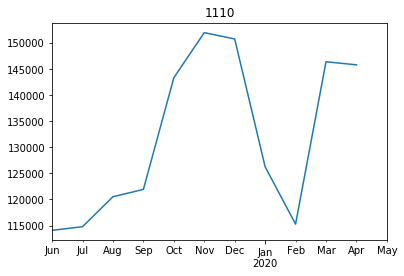

In [39]:
import datetime
import pandas as pd
import time

data = {}
n_days = 12
now = datetime.datetime.now()

year = now.year
month = now.month-1

while len(data) < n_days:
    
    print('parsing', year, month)
    
    # 使用 crawPrice 爬資料
    try:
        data['%d-%d-01'%(year, month)] = monthly_report(year, month)
    except Exception as e:
        print('get 404, please check if the revenues are not revealed')
    
    # 減一個月
    month -= 1
    if month == 0:
        month = 12
        year -= 1

    time.sleep(1)

for k in data.keys():
    data[k].index = data[k]['公司代號']
    
df = pd.DataFrame({k:df['當月營收'] for k, df in data.items()}).transpose()
df.index = pd.to_datetime(df.index)
df = df.sort_index()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
df['1110'].plot()
ax.set_title('1110')

Text(0.5, 1.0, '1101')

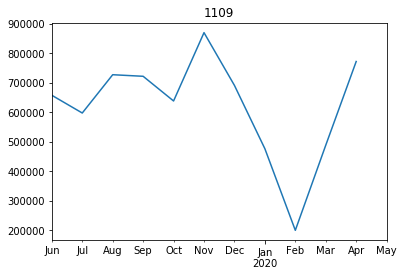

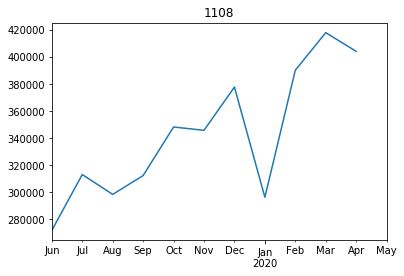

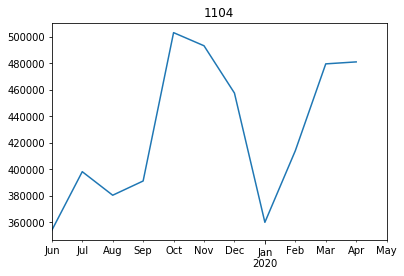

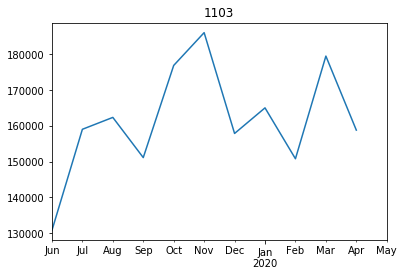

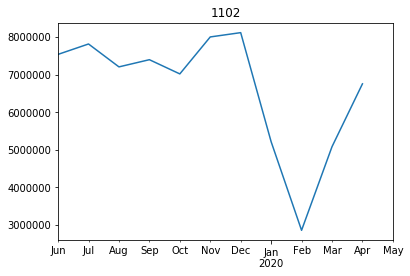

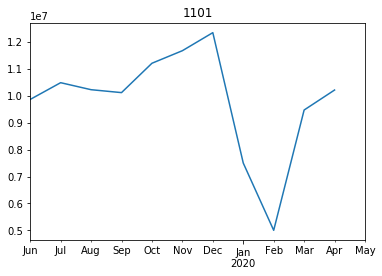

In [46]:
for k in data.keys():
    data[k].index = data[k]['公司代號']
    
df = pd.DataFrame({k:df['當月營收'] for k, df in data.items()}).transpose()
df.index = pd.to_datetime(df.index)
df = df.sort_index()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
df['1109'].plot()
ax.set_title('1109')

for k in data.keys():
    data[k].index = data[k]['公司代號']
    
df = pd.DataFrame({k:df['當月營收'] for k, df in data.items()}).transpose()
df.index = pd.to_datetime(df.index)
df = df.sort_index()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
df['1108'].plot()
ax.set_title('1108')

for k in data.keys():
    data[k].index = data[k]['公司代號']
    
df = pd.DataFrame({k:df['當月營收'] for k, df in data.items()}).transpose()
df.index = pd.to_datetime(df.index)
df = df.sort_index()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
df['1104'].plot()
ax.set_title('1104')

for k in data.keys():
    data[k].index = data[k]['公司代號']
    
df = pd.DataFrame({k:df['當月營收'] for k, df in data.items()}).transpose()
df.index = pd.to_datetime(df.index)
df = df.sort_index()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
df['1103'].plot()
ax.set_title('1103')

for k in data.keys():
    data[k].index = data[k]['公司代號']
    
df = pd.DataFrame({k:df['當月營收'] for k, df in data.items()}).transpose()
df.index = pd.to_datetime(df.index)
df = df.sort_index()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
df['1102'].plot()
ax.set_title('1102')

for k in data.keys():
    data[k].index = data[k]['公司代號']
    
df = pd.DataFrame({k:df['當月營收'] for k, df in data.items()}).transpose()
df.index = pd.to_datetime(df.index)
df = df.sort_index()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
df['1101'].plot()
ax.set_title('1101')

# 分析（四）：營業

In [36]:
#營業
import pandas as pd
stocknumber="1101"

df = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df = df[2][0:]
df = df[46:58]
#df.columns = df.iloc[0]
print(df[1][50])#
print(df[1][51])
print(df[1][52])
print(df[1][53])
print(df[1][56])

stocknumber="1102"

df2 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df2 = df2[2][0:]
df2 = df2[46:58]
#df.columns = df.iloc[0]
stocknumber="1103"

df3 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df3 = df3[2][0:]
df3 = df3[46:58]
stocknumber="1104"

df4 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df4 = df4[2][0:]
df4 = df4[46:58]
stocknumber="1108"

df5 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df5 = df5[2][0:]
df5 = df5[46:58]

stocknumber="1109"

df6 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df6 = df6[2][0:]
df6 = df6[46:58]

stocknumber="1110"

df7 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df7 = df7[2][0:]
df7 = df7[46:58]
aa={' ':['應收帳款週轉率⠀','平均收帳天數⠀⠀','存貨週轉率⠀⠀⠀','平均售貨天數⠀⠀','應付帳款付現天數'],' ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀'+'1101':[df[1][50],df[1][51],df[1][52],df[1][53],df[1][56]],'1102':[df2[1][50],df2[1][51],df2[1][52],df2[1][53],df2[1][56]],'⠀⠀'+'1103':[df3[1][50],df3[1][51],df3[1][52],df3[1][53],df3[1][56]],'1104':[df4[1][50],df4[1][51],df4[1][52],df4[1][53],df4[1][56]],'1108':[df5[1][50],df5[1][51],df5[1][52],df5[1][53],df5[1][56]],'1109':[df6[1][50],df6[1][51],df6[1][52],df6[1][53],df6[1][56]],'1110':[df7[1][50],df7[1][51],df7[1][52],df7[1][53],df7[1][56]]}
bb=pd.DataFrame(aa)
print(bb)


0.61
150.14
1.95
46.74
40.64
             ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀1101    1102 ⠀⠀1103   1104    1108    1109    1110
0  應收帳款週轉率⠀                0.61    0.65   2.16   1.01    1.09    0.53    1.09
1  平均收帳天數⠀⠀              150.14  140.35  42.22  90.35   83.54  172.79   83.78
2  存貨週轉率⠀⠀⠀                1.95    1.31  15.75   4.03    0.26    0.98    0.59
3  平均售貨天數⠀⠀               46.74   69.33   5.78  22.57  346.57   92.83  155.47
4  應付帳款付現天數               40.64  111.07  32.12  48.73   41.85  102.85   40.52


## 分析結果-4 營業篇
我們選了幾個衡量營業能力的指標比率。  
其中1103的收款能力最好；而1109的客戶較常拖欠應付款，平均收款天數竟有半年之久；  
存貨周轉率最佳與應付帳款付現天數最短的是1103，推斷1103的應收應付款方面管理較嚴謹。  
而1102的付款天數最長，此間企業應該有較好的信用與採購方的談判能力較強。

# 分析（五）：企業償債能力分析

In [1]:
import pandas as pd
stocknumber="1101"

df = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df = df[2][0:]
df = df[59:72]
#df.columns = df.iloc[0]
print(df[1][63])#流動比率
print(df[1][71])#利息保障倍數


stocknumber="1102"

df2 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df2 = df2[2][0:]
df2 = df2[59:72]
#df.columns = df.iloc[0]
stocknumber="1103"

df3 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df3 = df3[2][0:]
df3 = df3[59:72]
stocknumber="1104"

df4 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df4 = df4[2][0:]
df4 = df4[59:72]
stocknumber="1108"

df5 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df5 = df5[2][0:]
df5 = df5[59:72]

stocknumber="1109"

df6 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df6 = df6[2][0:]
df6 = df6[59:72]

stocknumber="1110"

df7 = pd.read_html('http://jsjustweb.jihsun.com.tw/z/zc/zcr/zcr_'+stocknumber+'.djhtm')
df7 = df7[2][0:]
df7 = df7[59:72]
aa={' ':['流動比率⠀','利息保障倍數'],' ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀'+'1101':[df[1][63],df[1][71]],'1102':[df2[1][63],df2[1][71]],'⠀⠀'+'1103':[df3[1][63],df3[1][71]],'1104':[df4[1][63],df4[1][71]],'1108':[df5[1][63],df5[1][71]],'1109':[df6[1][63],df6[1][71]],'1110':[df7[1][63],df7[1][71]]}
bb=pd.DataFrame(aa)
print(bb)

152.84
10
           ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀1101    1102  ⠀⠀1103   1104    1108    1109    1110
0   流動比率⠀              152.84  137.72  270.99  99.69  283.28  343.68  348.48
1  利息保障倍數                  10    5.18   -5.47    7.4   12.52  139.49  -24.53


## 分析結果-5 對企業償債能力篇
我們挑選了流動比率，與利息保障倍數當作指標。流動比率代表企業的短期變現能力。  
我們可以看出1104的流動比率小於100，表示流動資產小於流動負債。應注意是否有以短支長或周轉不靈的狀況。  
此外，1108、1109、1110的流動比率高，代表短期在還債上比較沒有壓力。
另一項分析指標是利息保障倍數，指企業借錢需要付的利息在稅前能不能被償還。  
通常利息保障倍數越高越好，代表企業付利息的壓力越小。
我們發現1103及1110的比率是負的，這跟他們這季的營收為負值有關。  
尤其是1110的利息保障倍數過低，獲利不足以支付利息，此時投資者應當特別警惕。  
此外1109的利息保障倍數非常高，可能代表這間企業的借款項目很少。